<a href="https://colab.research.google.com/github/ShaileshaPMaganahalli/CPME_258_Deep_Learning/blob/master/homework_1/Ungraded_Fast_AI_Lesson_2_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Shailesha - Ungraded Fast AI - Lesson 2 - Flowers dataset**

In [0]:
from fastai.vision import *
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
folder = 'flowers'
file = 'flowertest.txt'

In [0]:
path = Path('/content/drive/My Drive/Flowers')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/Flowers/jpg'),
 PosixPath('/content/drive/My Drive/Flowers/flowertest.txt'),
 PosixPath('/content/drive/My Drive/Flowers/flowervalid.txt'),
 PosixPath('/content/drive/My Drive/Flowers/flowertrain.txt'),
 PosixPath('/content/drive/My Drive/Flowers/flowers')]

In [0]:
classes = ['rose','jasmine']

In [0]:
download_images(path/file, dest, max_pics=200)

Error jpg/image_06977.jpg 34 Invalid URL 'jpg/image_06977.jpg 34': No schema supplied. Perhaps you meant http://jpg/image_06977.jpg 34?
Error jpg/image_05038.jpg 58 Invalid URL 'jpg/image_05038.jpg 58': No schema supplied. Perhaps you meant http://jpg/image_05038.jpg 58?
Error jpg/image_07216.jpg 6 Invalid URL 'jpg/image_07216.jpg 6': No schema supplied. Perhaps you meant http://jpg/image_07216.jpg 6?
Error jpg/image_02363.jpg 42 Invalid URL 'jpg/image_02363.jpg 42': No schema supplied. Perhaps you meant http://jpg/image_02363.jpg 42?
Error jpg/image_08052.jpg 23 Invalid URL 'jpg/image_08052.jpg 23': No schema supplied. Perhaps you meant http://jpg/image_08052.jpg 23?
Error jpg/image_03737.jpg 36 Invalid URL 'jpg/image_03737.jpg 36': No schema supplied. Perhaps you meant http://jpg/image_03737.jpg 36?
Error jpg/image_00102.jpg 76 Invalid URL 'jpg/image_00102.jpg 76': No schema supplied. Perhaps you meant http://jpg/image_00102.jpg 76?
Error jpg/image_01232.jpg 73 Invalid URL 'jpg/image

In [0]:
download_images(path/file, dest, max_pics=20, max_workers=0)

Error jpg/image_06977.jpg 34 Invalid URL 'jpg/image_06977.jpg 34': No schema supplied. Perhaps you meant http://jpg/image_06977.jpg 34?
Error jpg/image_00800.jpg 80 Invalid URL 'jpg/image_00800.jpg 80': No schema supplied. Perhaps you meant http://jpg/image_00800.jpg 80?
Error jpg/image_05038.jpg 58 Invalid URL 'jpg/image_05038.jpg 58': No schema supplied. Perhaps you meant http://jpg/image_05038.jpg 58?
Error jpg/image_06759.jpg 0 Invalid URL 'jpg/image_06759.jpg 0': No schema supplied. Perhaps you meant http://jpg/image_06759.jpg 0?
Error jpg/image_01133.jpg 45 Invalid URL 'jpg/image_01133.jpg 45': No schema supplied. Perhaps you meant http://jpg/image_01133.jpg 45?
Error jpg/image_07982.jpg 100 Invalid URL 'jpg/image_07982.jpg 100': No schema supplied. Perhaps you meant http://jpg/image_07982.jpg 100?
Error jpg/image_04468.jpg 89 Invalid URL 'jpg/image_04468.jpg 89': No schema supplied. Perhaps you meant http://jpg/image_04468.jpg 89?
Error jpg/image_02363.jpg 42 Invalid URL 'jpg/im

In [0]:
for i in classes:
    print(i)
    verify_images(path/i, delete=True, max_size=500)

rose
jasmine


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['jpg']

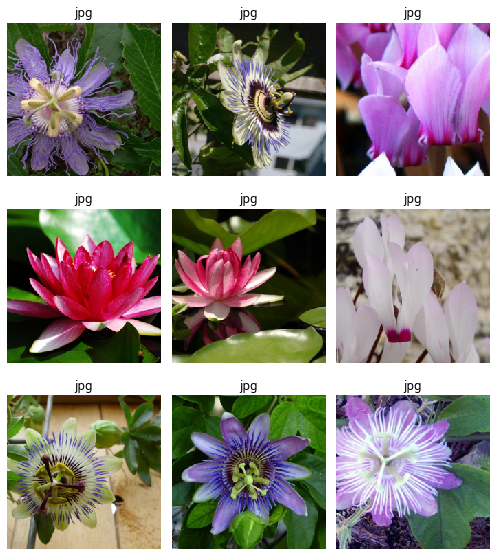

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['jpg'], 1, 372, 93)

In [0]:
cnn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
cnn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,02:28
1,0.000000,0.000000,0.000000,02:01
2,0.000000,0.000000,0.000000,02:02


In [0]:
cnn.save('stage-1')

In [0]:
cnn.unfreeze()

In [0]:
cnn.lr_find()

In [0]:
cnn.recorder.plot()

In [0]:
cnn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [0]:
cnn.save('stage-1')

In [0]:
cnn.load('stage-1');

In [0]:
interp  = ClassificationInterpretation.from_learner(cnn)

In [0]:
interp.plot_confusion_matrix()